<a href="https://colab.research.google.com/github/EdVKu/Numeric_Simulation_Fluid/blob/main/ProyectoDMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto Final Dinámica de Medios Deformables

Yara Itzel Herrera Ramírez

Eduardo Vázquez Kuri

# Transformación Kármán-Trefftz

Dada la Transformación de Joukowsky:

\begin{equation}
  \Gamma(z) = z + \frac{1}{z}
\end{equation}

con $z = a +ib$ un número complejo, se realiza lo siguiente:

1. Sumamos y restamos 2 a la ecuación:

\begin{align*}
  \Gamma(z) + 2 &= z + 2 + \frac{1}{z}\\
  &= \frac{1}{z}(z^2 + 2z + 1)\\
  &= \frac{1}{z}(z+1)^2\\
\end{align*}

\begin{align*}
  \Gamma(z) - 2 &= z - 2 + \frac{1}{z}\\
  &= \frac{1}{z}(z^2 - 2z + 1)\\
  &= \frac{1}{z}(z-1)^2\\
\end{align*}

Dividimos ambas ecuaciones entre sí:

\begin{align*}
  \frac{\Gamma(z) + 2}{\Gamma(z) - 2} &= \frac{(z+1)^2}{(z-1)^2}\\
\end{align*}

Cambiando 2 por n tal que $n \approx 2$, se obtiene:

\begin{align*}
  \frac{\Gamma(z) + n}{\Gamma(z) - n} &= \frac{(z+1)^n}{(z-1)^n}\\
\end{align*}

Y reacomodando, se obtiene:

$$\Gamma(z) = \frac{(z+1)^n + (z-1)^n}{(z-1)^n-(z+1)^n}$$

La cual se denomina "Transformación Kármán-Trefftz". Para este proyecto, se aplicó esta transformación a círculos en el plano complejo (números z tales que $z(\theta) = \rho e^{i\theta} + w$, con $w$ un número complejo constante y $\rho$ una constante arbitraria dada).

In [ ]:
import cmath, math
import numpy as np

import matplotlib.pyplot as plt
theta = np.linspace(0,2*math.pi,1000)
n = 1



def distance(x1,x2,y1,y2):
  return np.sqrt((x2-x1)**2 + (y2-y1)**2)

def KT(theta, n, r = 1, x = 0, y = 0):
  return n*((complex(r*math.cos(theta) + x,r*math.sin(theta) + y)+1)**n + (complex(r*math.cos(theta) + x,r*math.sin(theta) + y)-1)**n) /((complex(r*math.cos(theta) + x,r*math.sin(theta) + y)-1)**n - (complex(r*math.cos(theta) + x,r*math.sin(theta) + y)+1)**n)
r = np.linspace(1.3,1.5,100)
jk = []
for i in r:
  for th in theta:
    jk.append(11*KT(th,1.6,i,0,0) + complex(50, 100))

xi = [KT(i,n,1,0,0) for i in theta]
n = 1.8
xi2 = [KT(i,n,1,0,0) for i in theta]
n = 1.9
xi3 = [KT(i,n,1,0,0) for i in theta]
#xi2 = [complex(math.cos(i),math.sin(i)) for i in theta]


x = [i.real for i in xi]
y = [i.imag for i in xi]

x2 = [i.real for i in xi2]
y2 = [i.imag for i in xi2]

# np.sqrt((max(x2) - min(x2))**2 + (max(y2)-min(y2))**2)

x3 = [i.real for i in xi3]
y3 = [i.imag for i in xi3]

xj = [round(t.real,2) for t in jk]
yj = [round(t.imag,2) for t in jk]



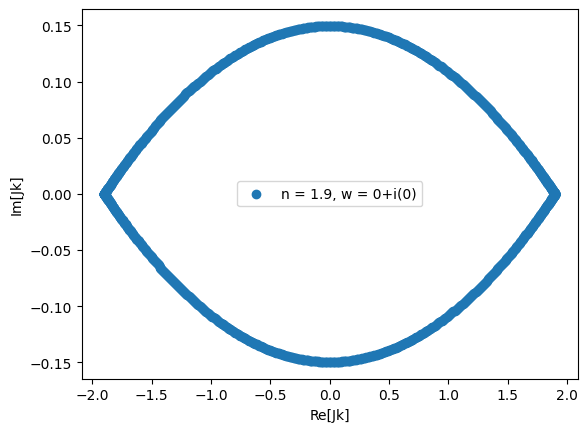

In [ ]:
plt.scatter(x3,y3, label ="n = 1.9, w = 0+i(0)")

plt.xlabel('Re[Jk]')
plt.ylabel('Im[Jk]')
plt.legend()
plt.show()

Para el círculo

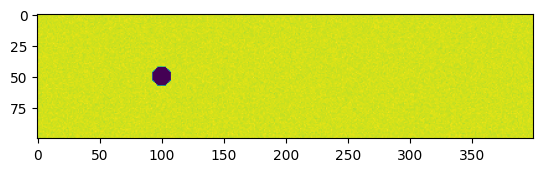

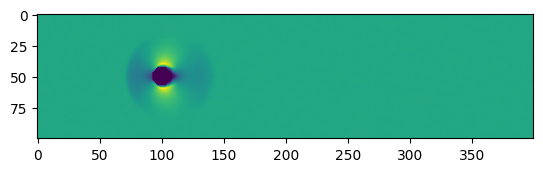

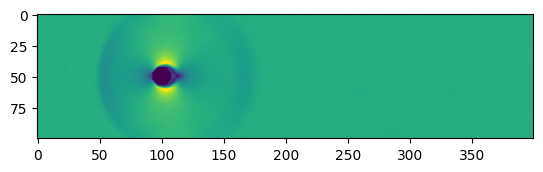

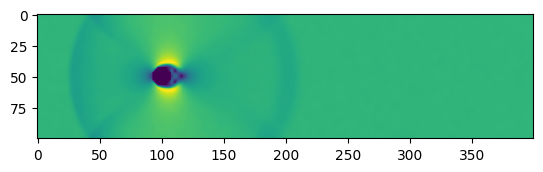

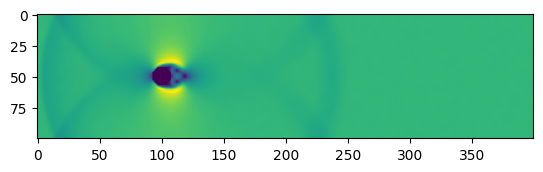

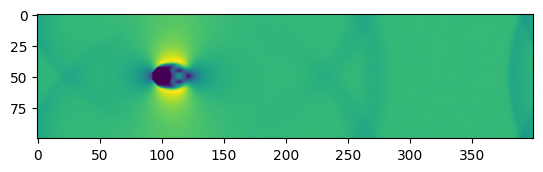

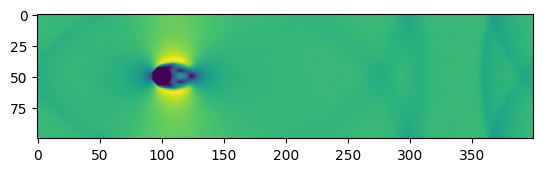

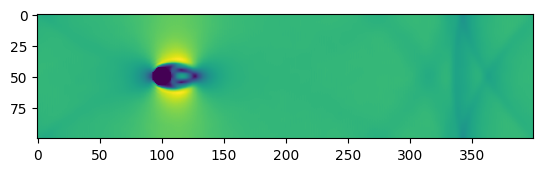

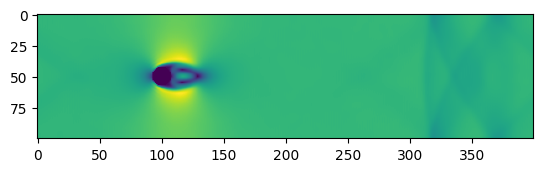

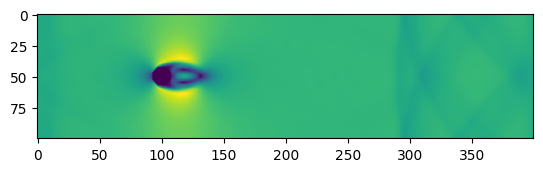

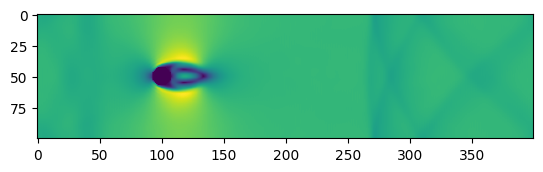

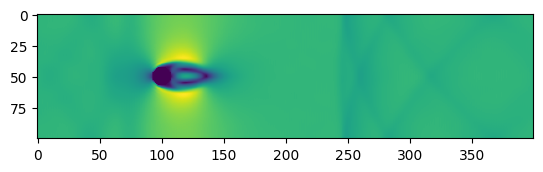

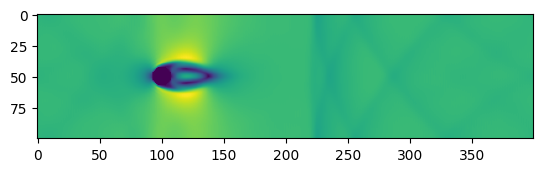

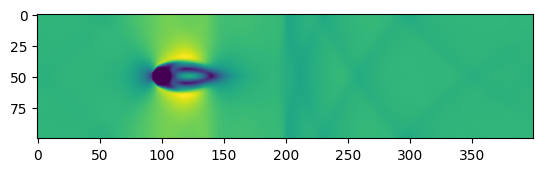

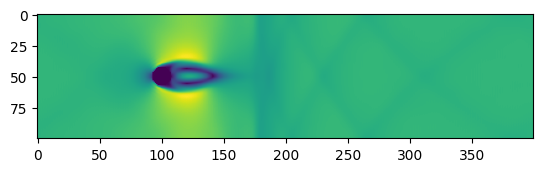

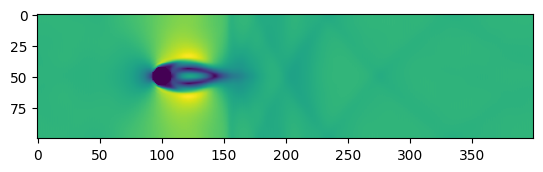

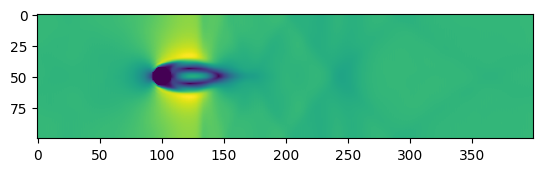

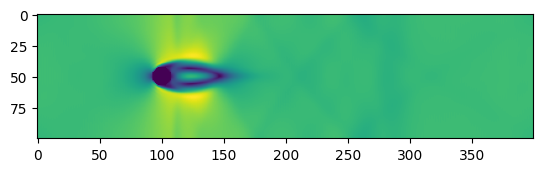

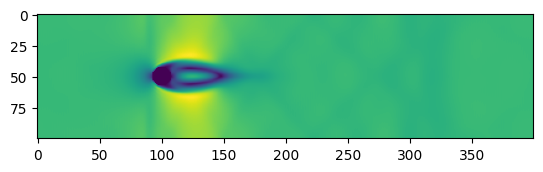

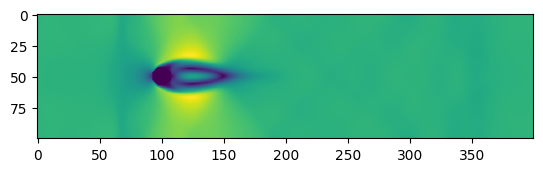

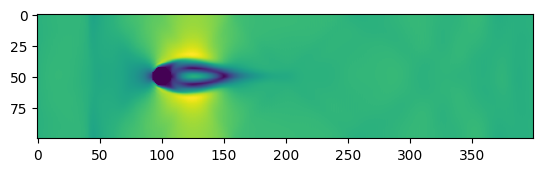

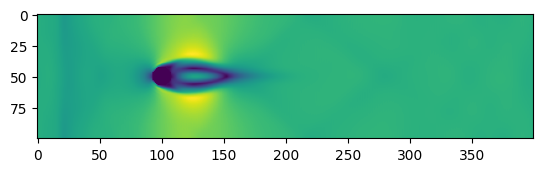

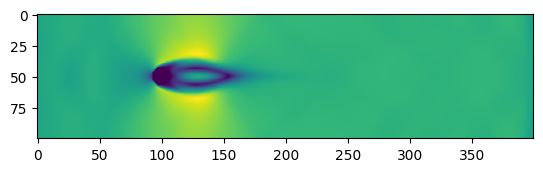

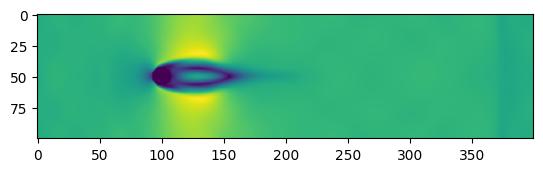

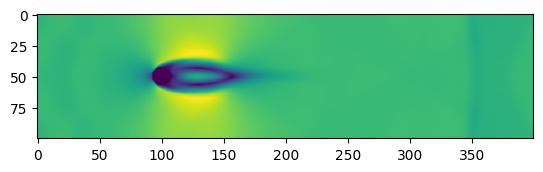

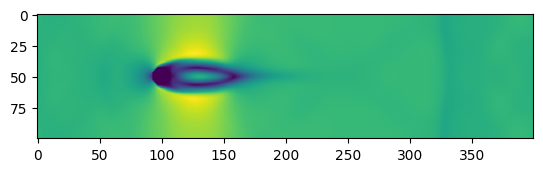

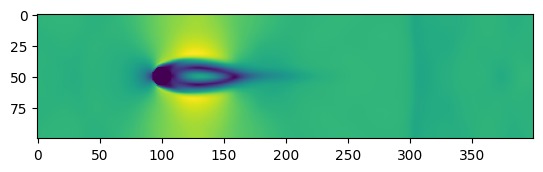

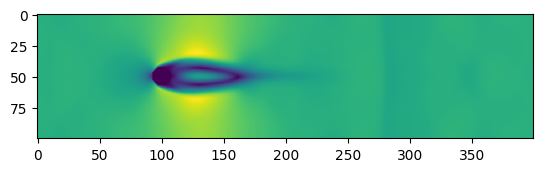

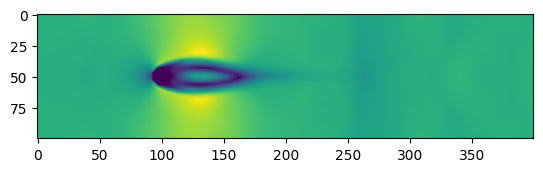

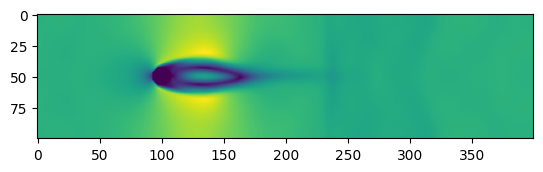

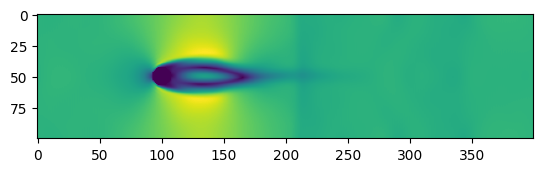

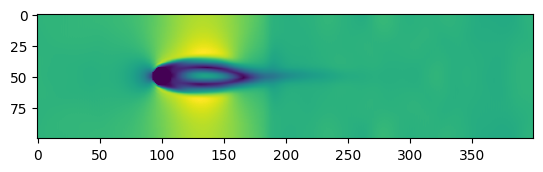

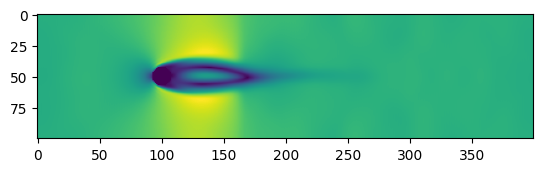

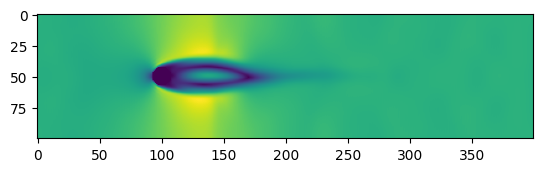

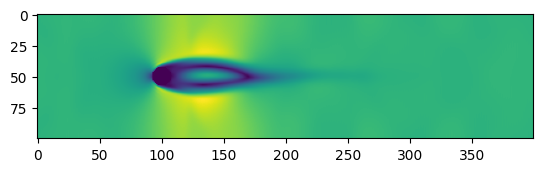

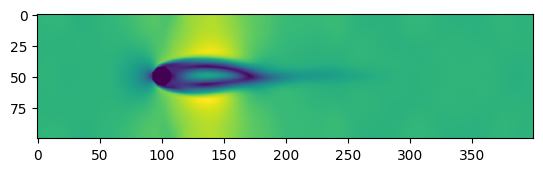

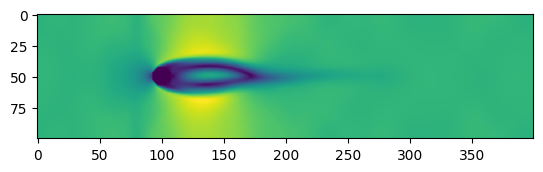

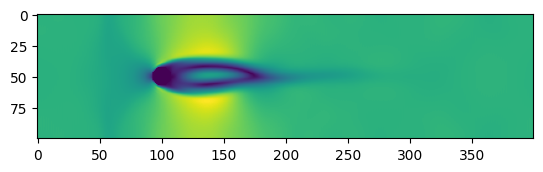

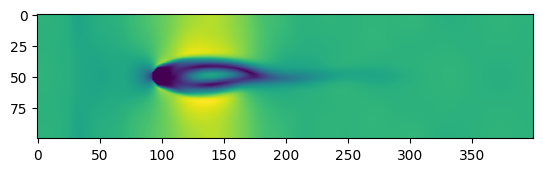

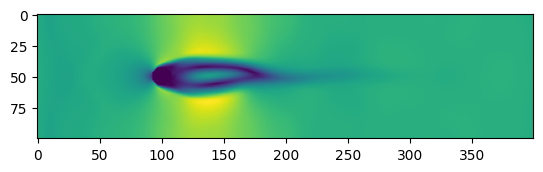

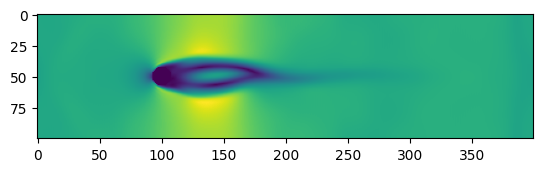

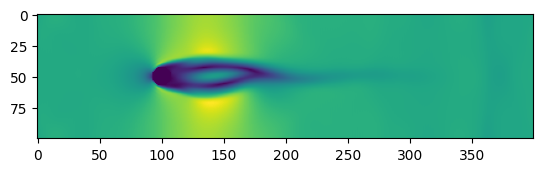

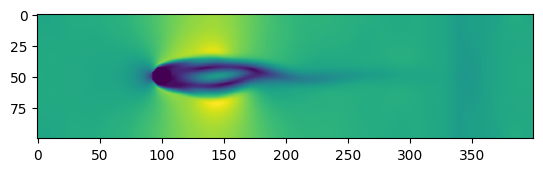

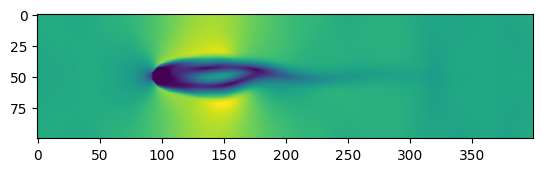

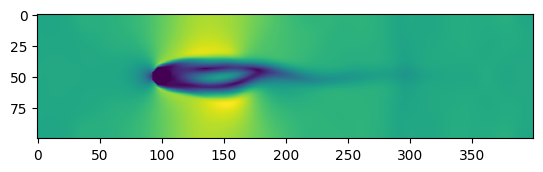

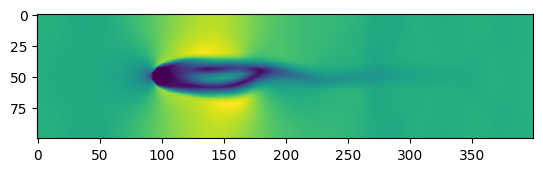

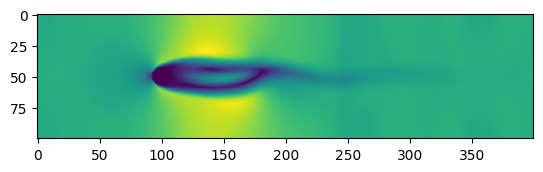

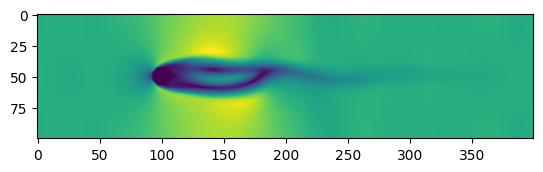

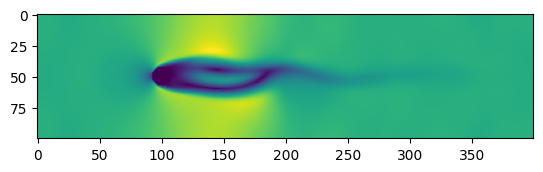

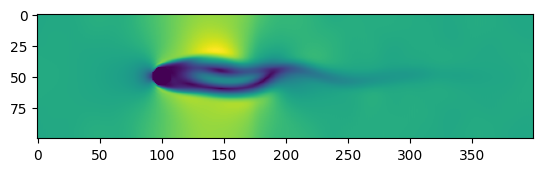

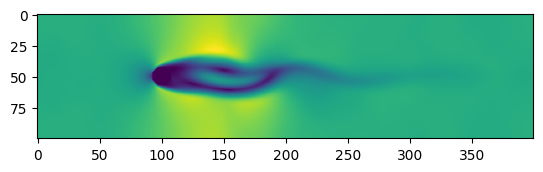

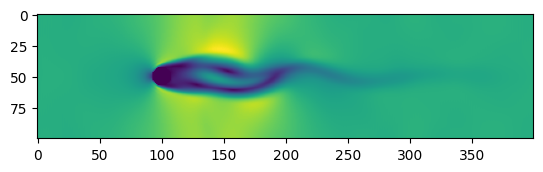

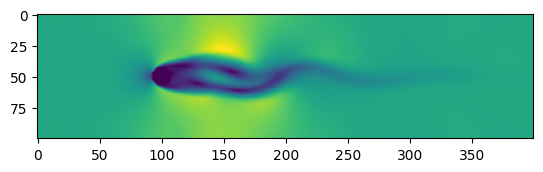

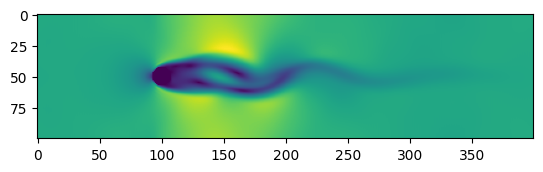

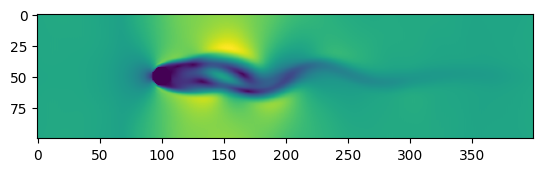

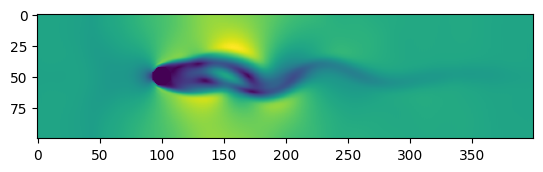

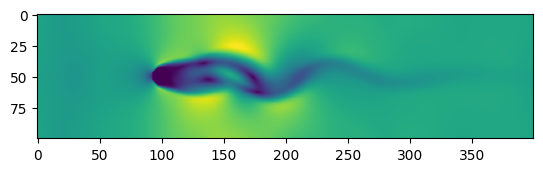

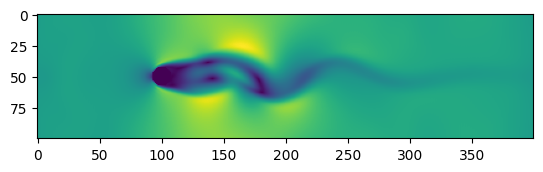

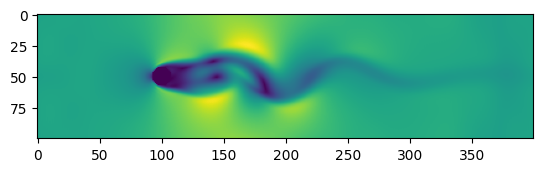

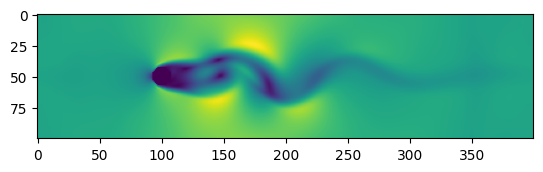

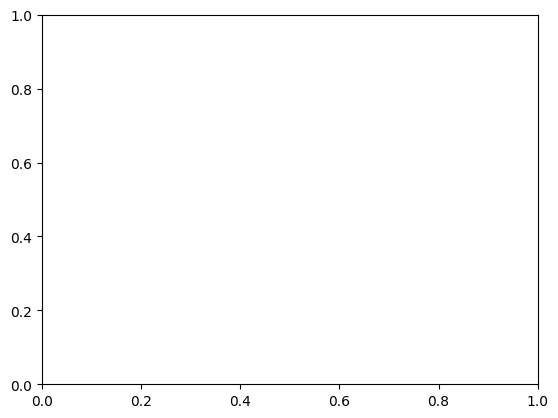

In [ ]:
import numpy as np
from matplotlib import pyplot
beta = 100
Hx, Hy = [], []
plot_every = 50
def distance(x1,y1,x2,y2, b, c):
  return np.sqrt(((x2-x1)**2)/(b**2) + ((y2-y1)**2)/(c**2))
def main():
  Nx = 4*beta
  Ny = beta
  tau = 0.53
  Nt = 3000

  # pesos y velocidades de la lattice
  NL = 9
  cxs = np.array([0,0,1,1,1,0,-1,-1,-1])
  cys = np.array([0,1,1,0,-1,-1,-1,0,1])
  wts = np.array([4/9, 1/9, 1/36, 1/9, 1/36, 1/9,1/36, 1/9,1/36])

  F = np.ones((Ny, Nx, NL)) + 0.01*np.random.randn(Ny,Nx,NL)
  F[:, :, 3] = 2.3
#distance(Nx//4, Ny//2, x, y)<13
  cilindro = np.full((Ny, Nx), False)
  for y in range(0,Ny):
    for x in range(0, Nx):
      if distance(Nx//4, Ny//2, x, y, 0.006*beta, 0.006*beta)<13:
        cilindro[y][x] = True
  for it in range(Nt):
    for i, cx, cy in zip(range(NL), cxs, cys):
      F[:,:,i] = np.roll(F[:,:,i], cx, axis = 1)

      F[:,:,i] = np.roll(F[:,:,i], cy, axis = 0)
    bndrF = F[cilindro, :]
    bndrF = bndrF[:, [0,5,6,7,8,1,2,3,4]]
    rho = np.sum(F,2)
    ux = np.sum(F * [cxs],2)/rho
    uy = np.sum(F * [cys],2)/rho
    F[cilindro, :] = bndrF
    ux[cilindro] = 0
    uy[cilindro] = 0
    Hx.append(np.array([ux]))
    Hy.append(np.array([uy]))
    # Colisiones
    Feq = np.zeros(F.shape)
    for i, cx, cy, w in zip(range(NL), cxs, cys, wts):
      Feq[:,:,i] = rho * w * (
          1+ 3*(cx*ux + cy*uy) + 9*(cx*ux + cy*uy)**2/2 - 3*(ux**2 + uy**2)/2
      )
    F = F -(1/tau) * (F-Feq)

    if(it%plot_every ==0):
      pyplot.imshow(np.sqrt(ux**2 + uy**2))
      pyplot.pause(0.01)
      pyplot.cla()
if __name__ == "__main__":
  main()

In [ ]:
wx,wy = [],[]
for j in range(4*beta):
  for i in range(beta):
    for k in range(2999):
      wx.append((np.array(Hx[k+1][0][i][j]))-np.array((Hx[k][0][i][j]))*3000)


for j in range(4*beta):
  for i in range(beta):
    for k in range(2999):
      wy.append((np.array(Hy[k+1][0][i][j])-np.array(Hy[k][0][i][j]))*3000)

In [ ]:
print("Fuerza de arrastre (círculo): ",  (max(wx)),", Fuerza de sustentación (circulo)", (max(wy)) )

Fuerza de arrastre (círculo):  370.1594812186105 , Fuerza de sustentación (circulo) 126.03261896284528


Para la elipse vertical

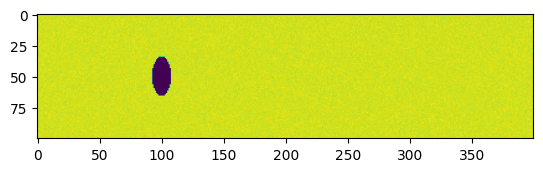

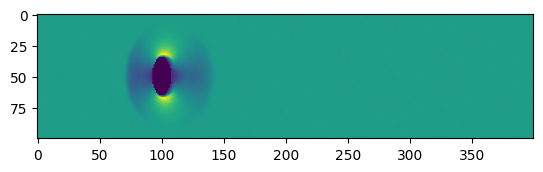

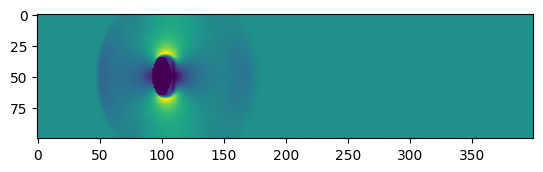

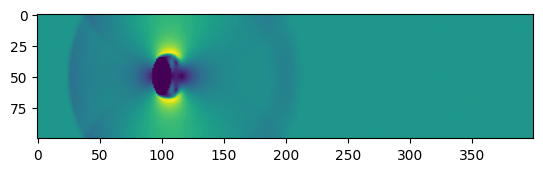

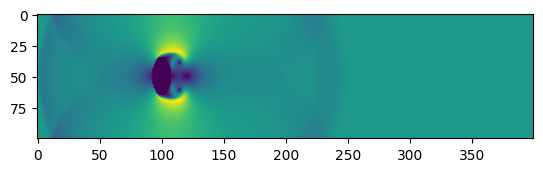

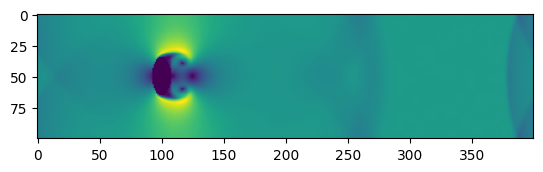

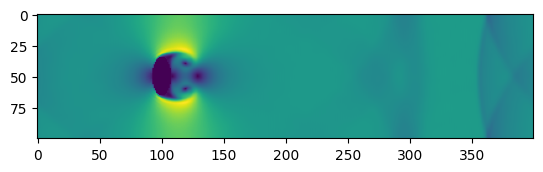

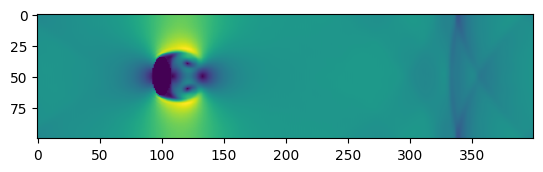

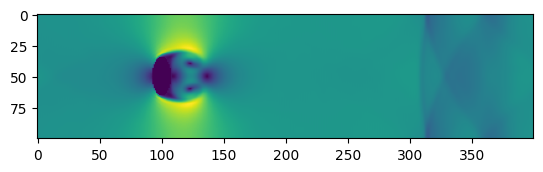

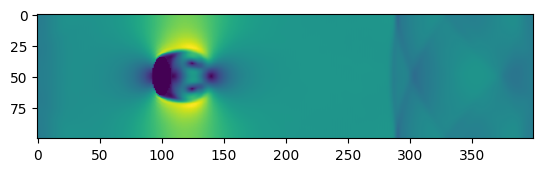

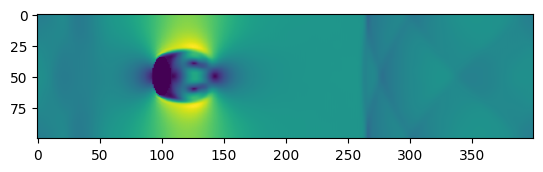

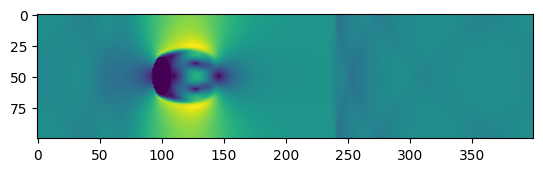

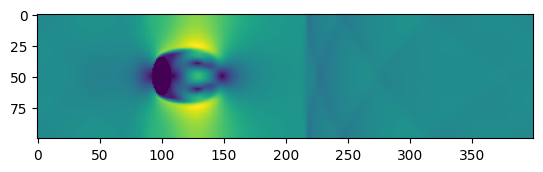

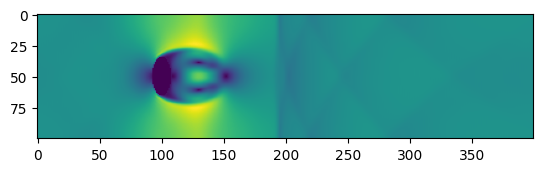

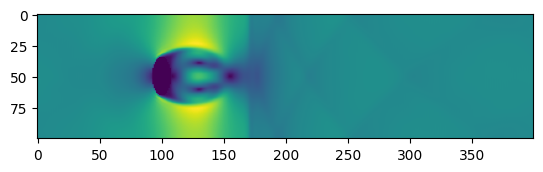

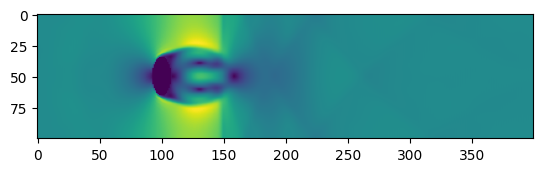

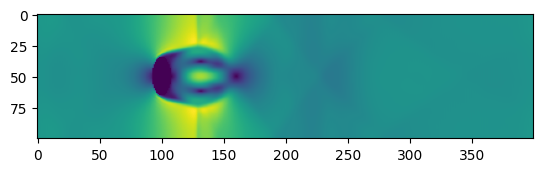

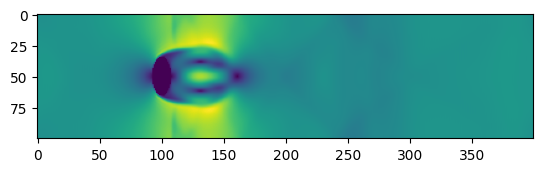

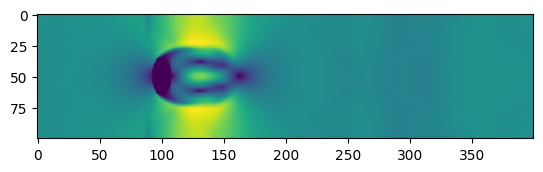

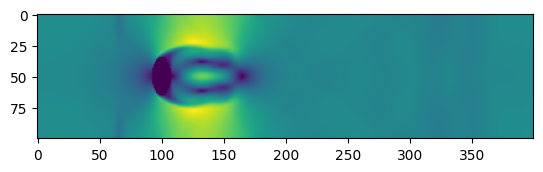

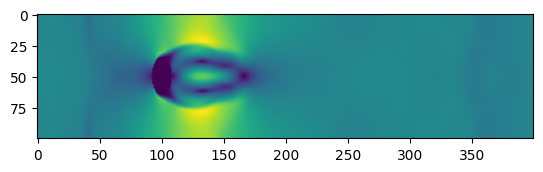

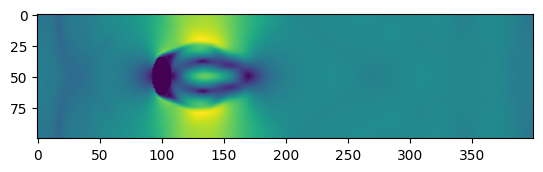

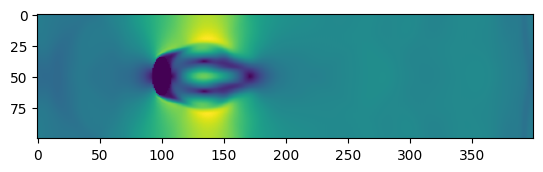

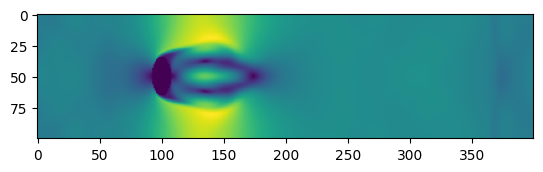

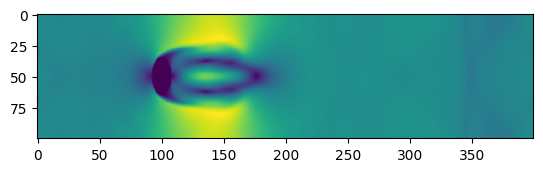

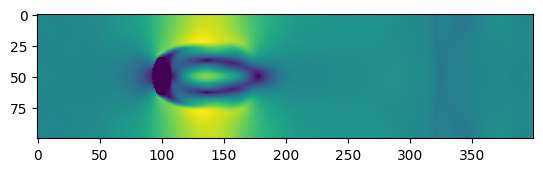

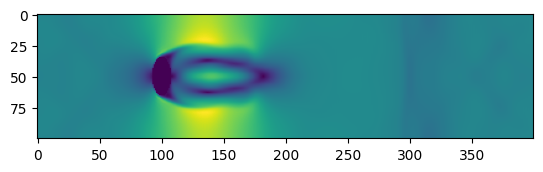

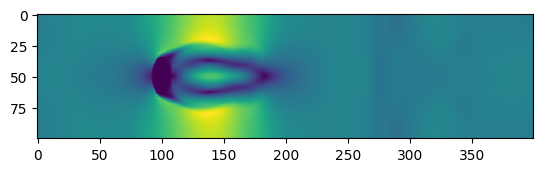

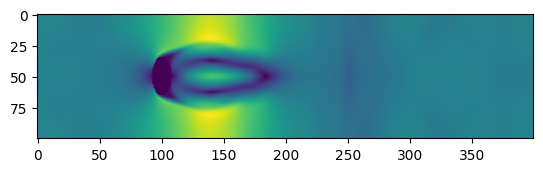

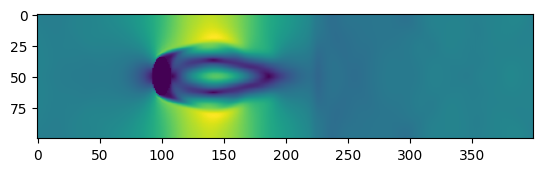

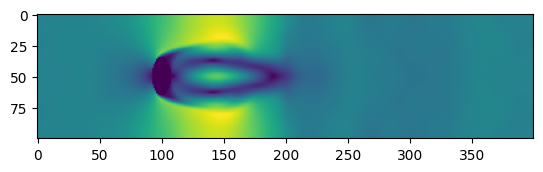

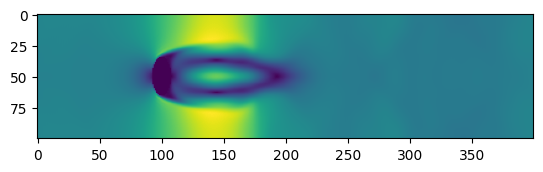

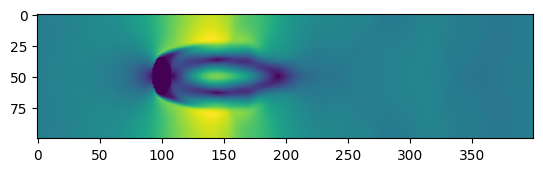

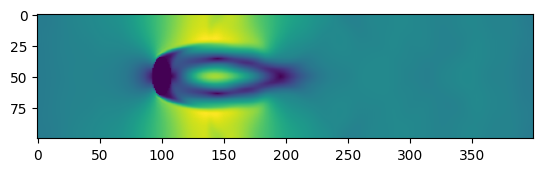

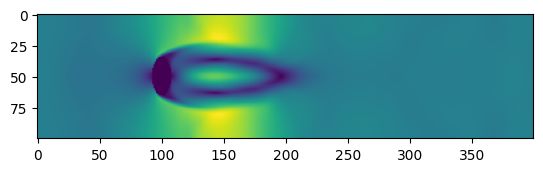

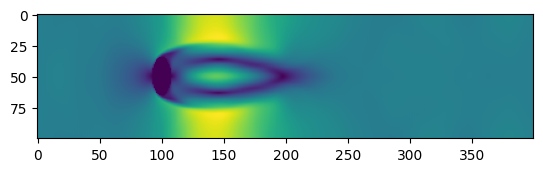

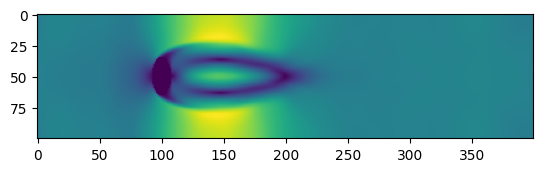

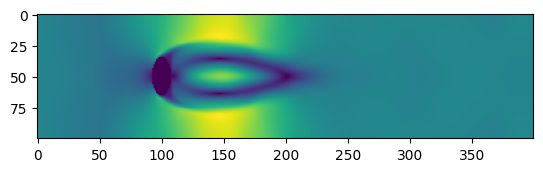

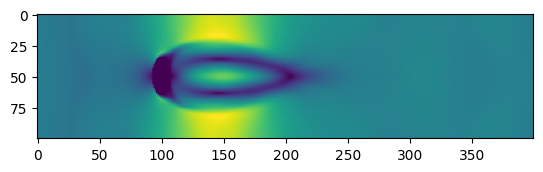

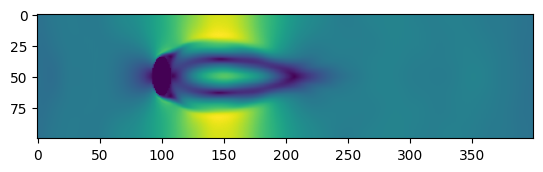

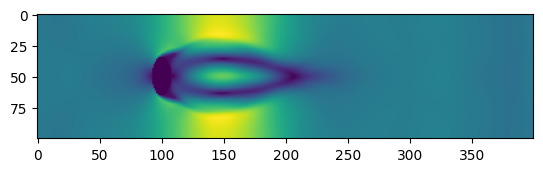

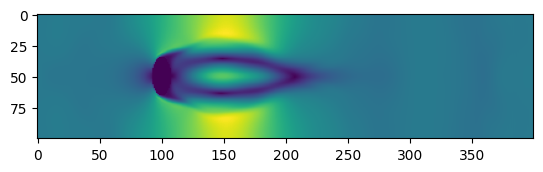

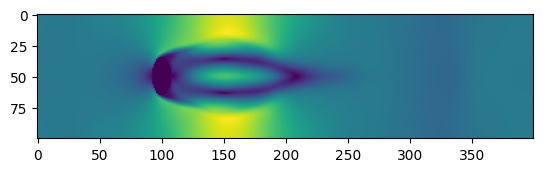

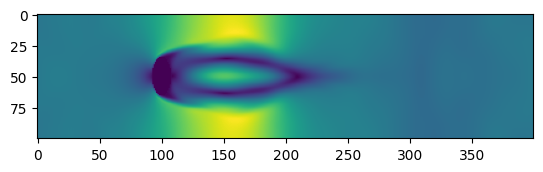

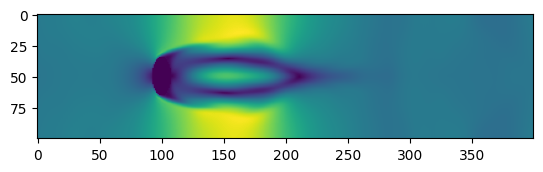

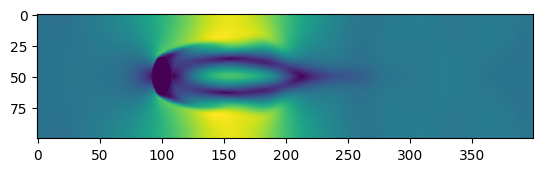

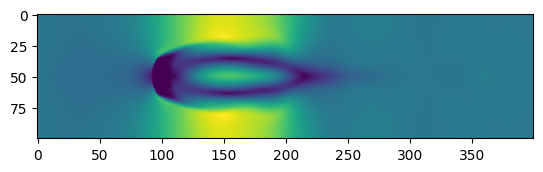

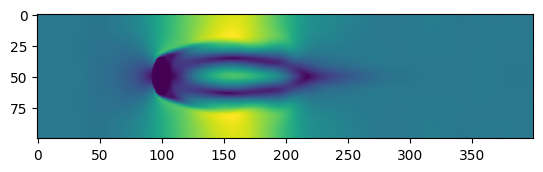

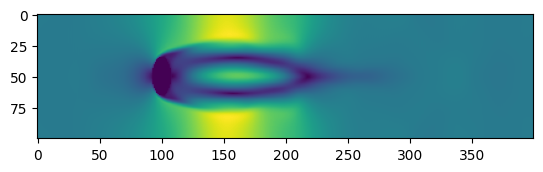

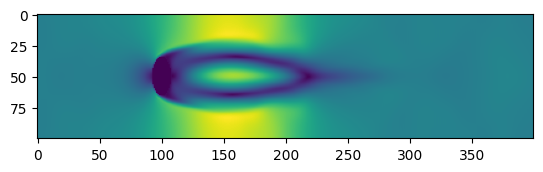

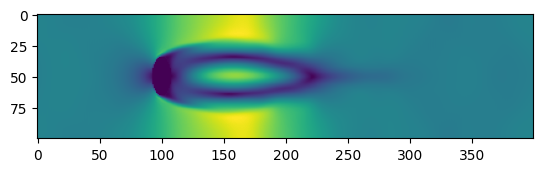

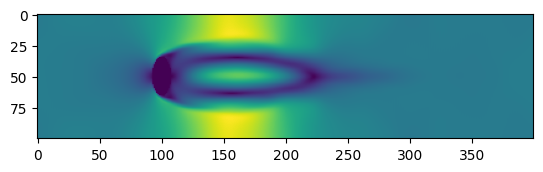

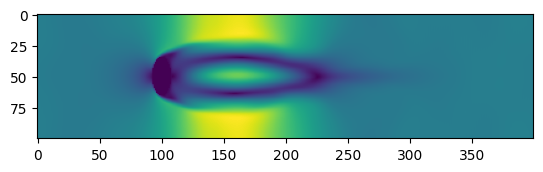

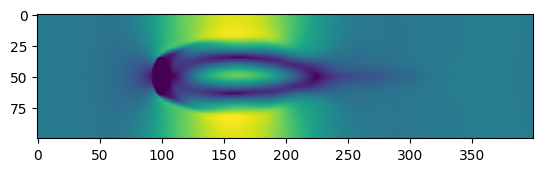

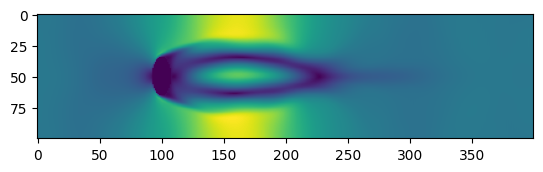

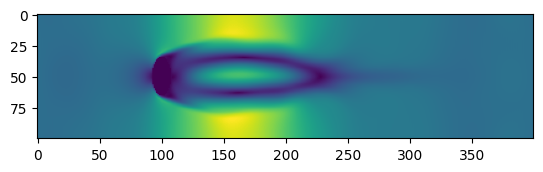

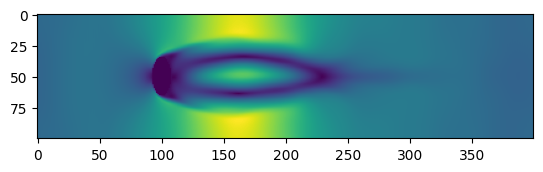

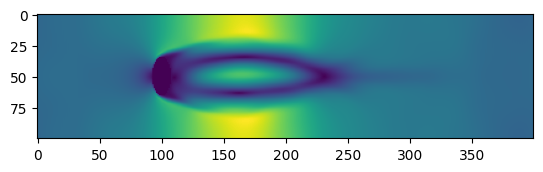

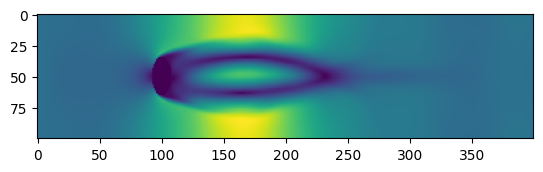

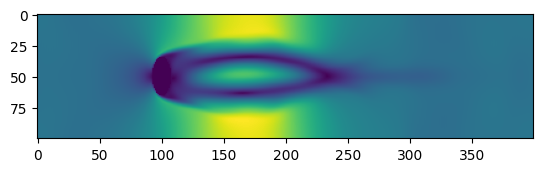

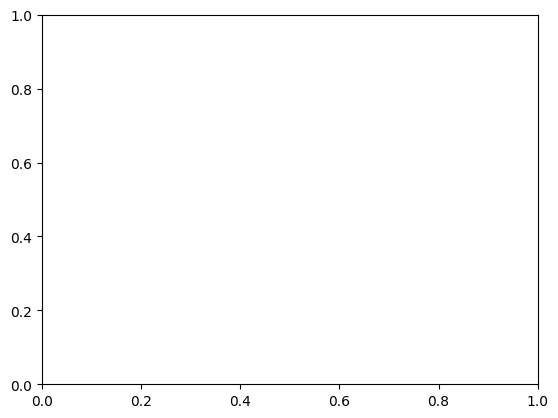

In [ ]:
import numpy as np
from matplotlib import pyplot
beta = 100
Hx, Hy = [], []
plot_every = 50
def distance(x1,y1,x2,y2, b, c):
  return np.sqrt(((x2-x1)**2)/(b**2) + ((y2-y1)**2)/(c**2))
def main():
  Nx = 4*beta
  Ny = beta
  tau = 0.53
  Nt = 3000

  # pesos y velocidades de la lattice
  NL = 9
  cxs = np.array([0,0,1,1,1,0,-1,-1,-1])
  cys = np.array([0,1,1,0,-1,-1,-1,0,1])
  wts = np.array([4/9, 1/9, 1/36, 1/9, 1/36, 1/9,1/36, 1/9,1/36])

  F = np.ones((Ny, Nx, NL)) + 0.01*np.random.randn(Ny,Nx,NL)
  F[:, :, 3] = 2.3
#distance(Nx//4, Ny//2, x, y)<13
  cilindro = np.full((Ny, Nx), False)
  for y in range(0,Ny):
    for x in range(0, Nx):
      if distance(Nx//4, Ny//2, x, y, 0.006*beta, 0.012*beta)<13:
        cilindro[y][x] = True
  for it in range(Nt):
    for i, cx, cy in zip(range(NL), cxs, cys):
      F[:,:,i] = np.roll(F[:,:,i], cx, axis = 1)

      F[:,:,i] = np.roll(F[:,:,i], cy, axis = 0)
    bndrF = F[cilindro, :]
    bndrF = bndrF[:, [0,5,6,7,8,1,2,3,4]]
    rho = np.sum(F,2)
    ux = np.sum(F * [cxs],2)/rho
    uy = np.sum(F * [cys],2)/rho
    F[cilindro, :] = bndrF
    ux[cilindro] = 0
    uy[cilindro] = 0
    Hx.append(np.array([ux]))
    Hy.append(np.array([uy]))
    # Colisiones
    Feq = np.zeros(F.shape)
    for i, cx, cy, w in zip(range(NL), cxs, cys, wts):
      Feq[:,:,i] = rho * w * (
          1+ 3*(cx*ux + cy*uy) + 9*(cx*ux + cy*uy)**2/2 - 3*(ux**2 + uy**2)/2
      )
    F = F -(1/tau) * (F-Feq)

    if(it%plot_every ==0):
      pyplot.imshow(np.sqrt(ux**2 + uy**2))
      pyplot.pause(0.01)
      pyplot.cla()
if __name__ == "__main__":
  main()

In [ ]:
wx,wy = [],[]
for j in range(4*beta):
  for i in range(beta):
    for k in range(2999):
      wx.append((np.array(Hx[k+1][0][i][j]))-np.array((Hx[k][0][i][j]))*3000)


for j in range(4*beta):
  for i in range(beta):
    for k in range(2999):
      wy.append((((np.array(Hy[k+1][0][i][j])-np.array(Hy[k][0][i][j]))*3000)))

In [ ]:

print("Fuerza de arrastre (elipse vertical): ",  (max(wx)),", Fuerza de sustentación (elipse vertical)", (max(wy)) )

Fuerza de arrastre (elipse vertical):  586.871850866686 , Fuerza de sustentación (elipse vertical) 139.7317809359898


Para la elipse horizontal

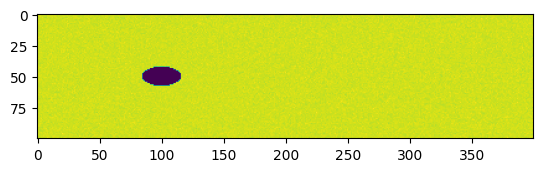

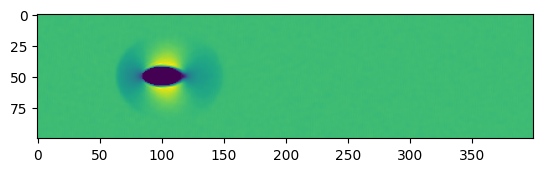

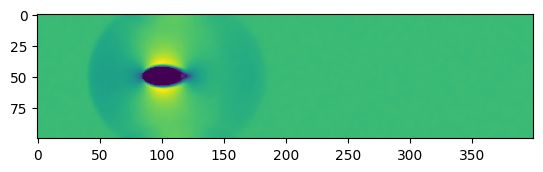

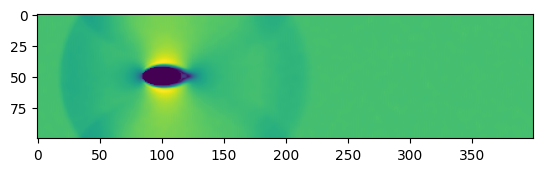

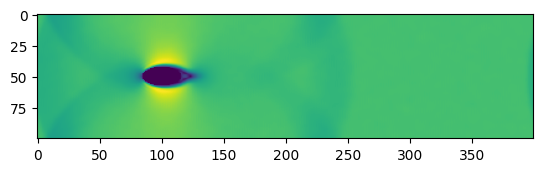

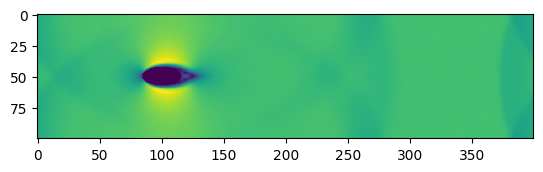

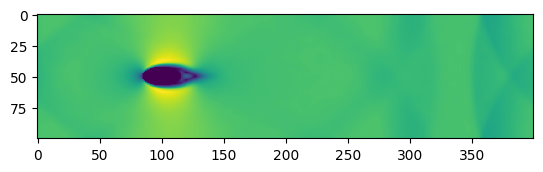

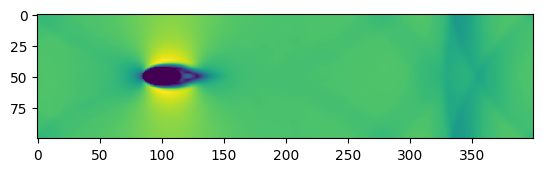

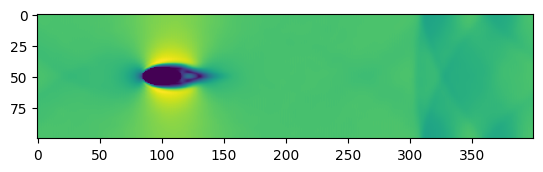

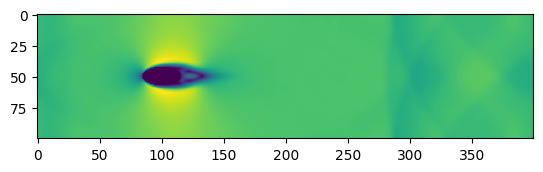

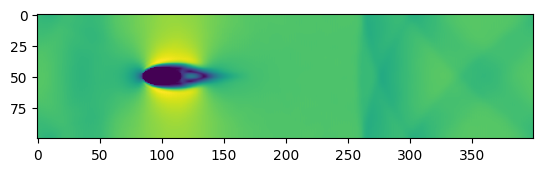

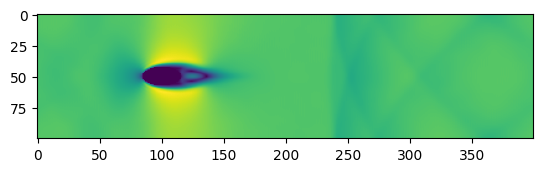

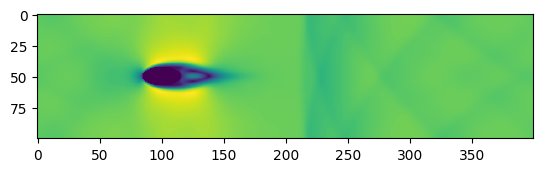

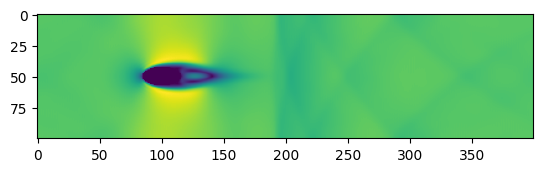

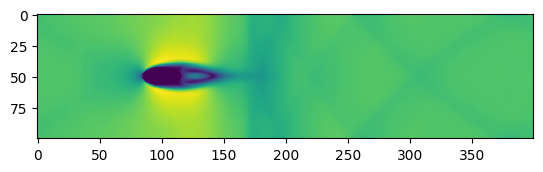

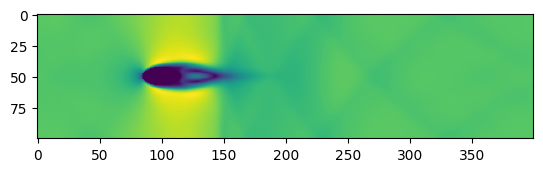

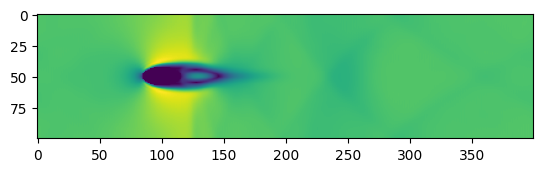

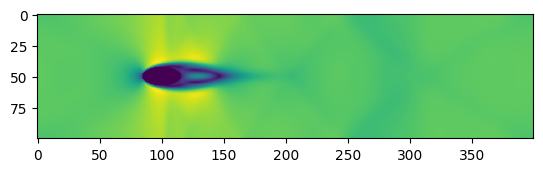

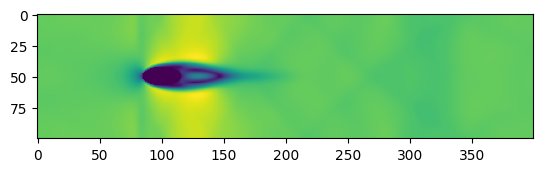

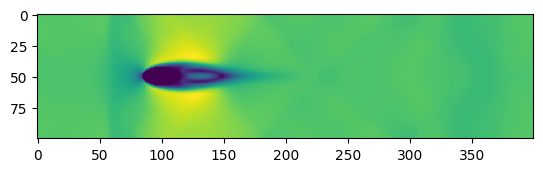

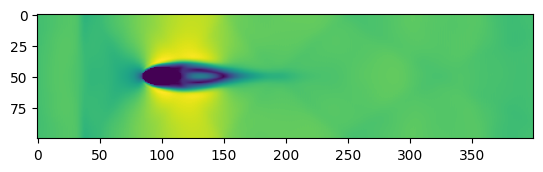

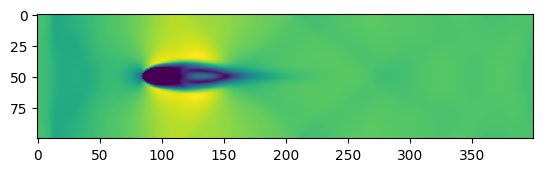

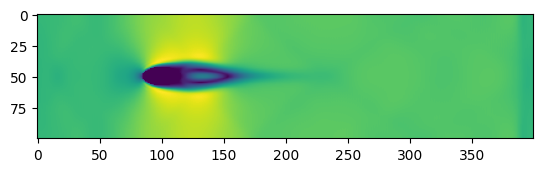

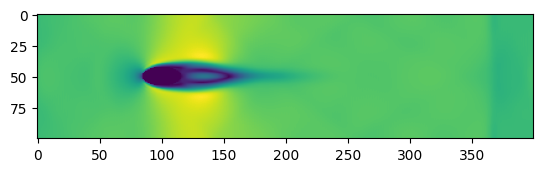

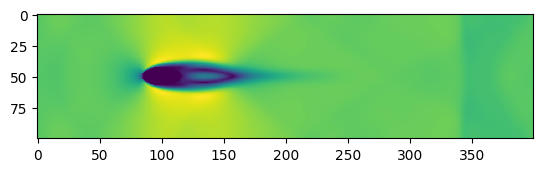

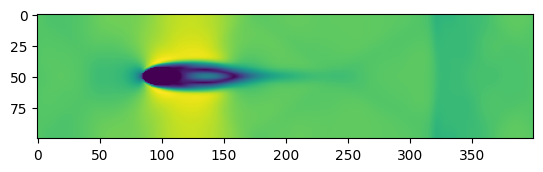

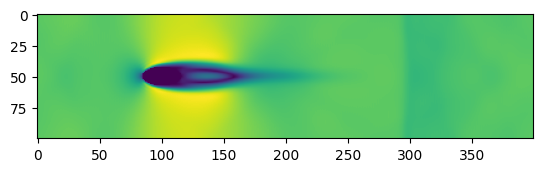

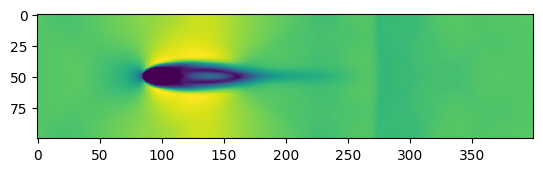

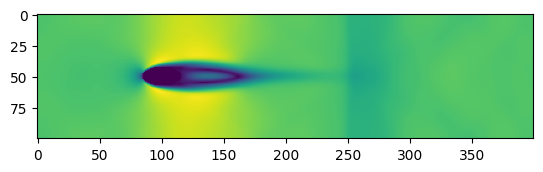

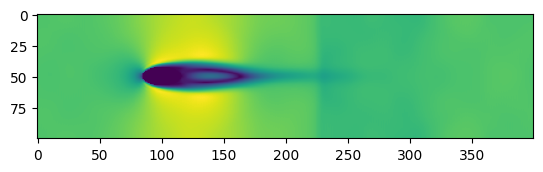

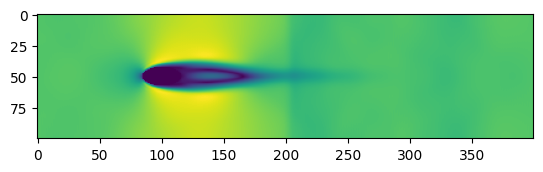

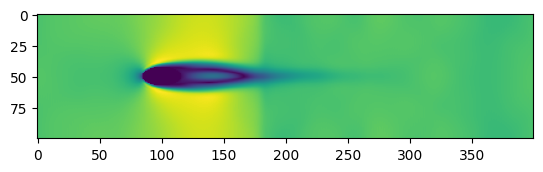

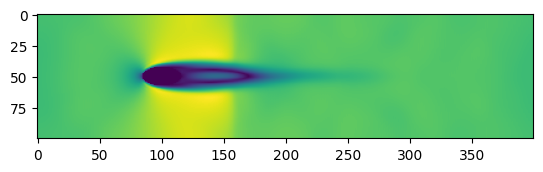

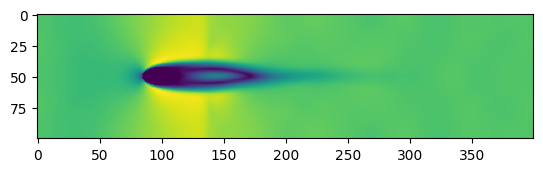

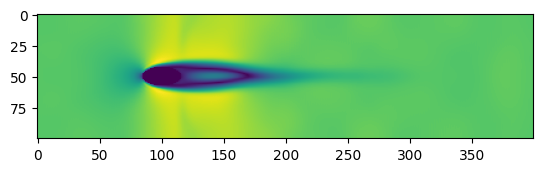

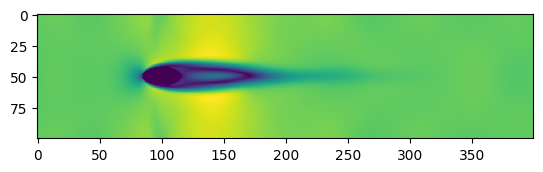

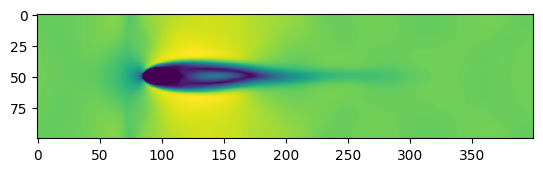

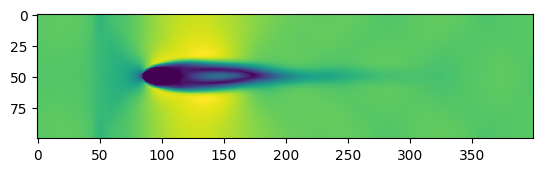

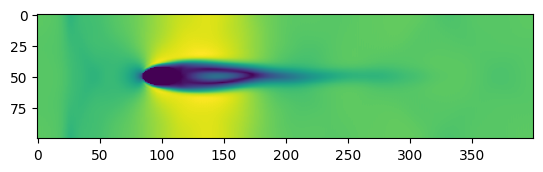

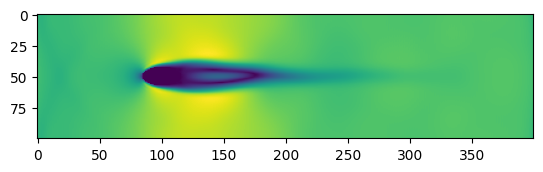

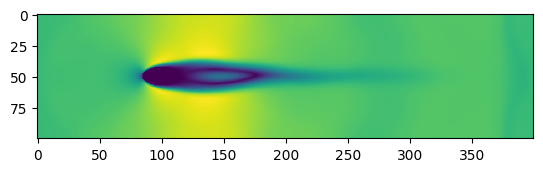

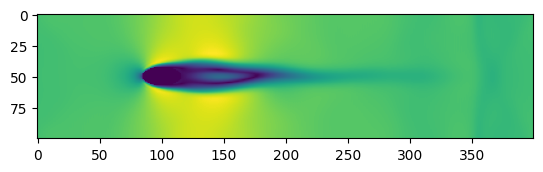

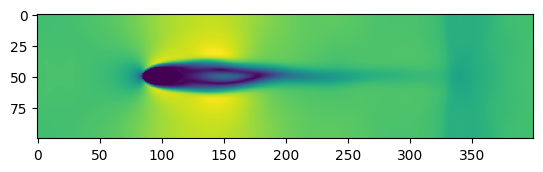

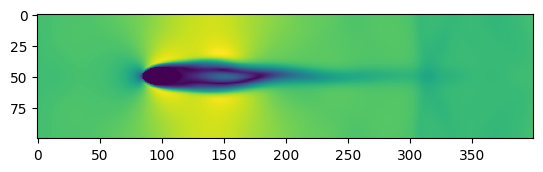

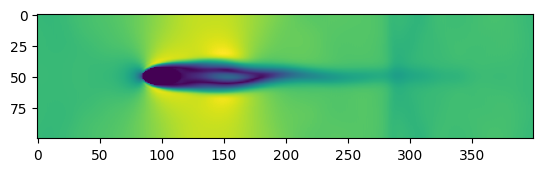

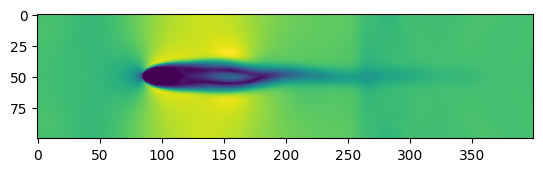

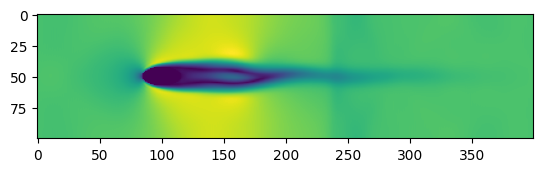

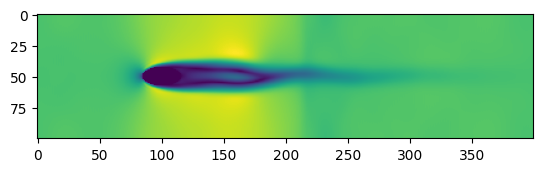

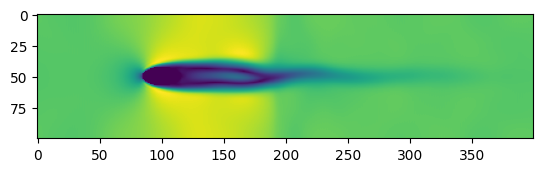

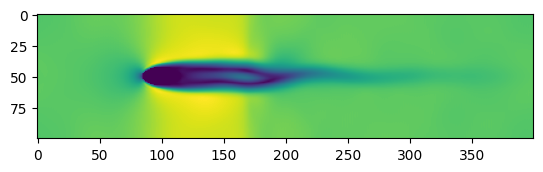

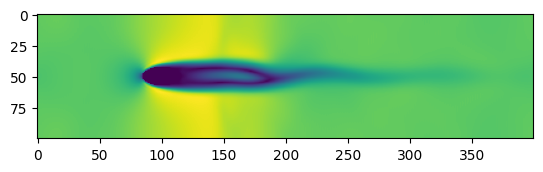

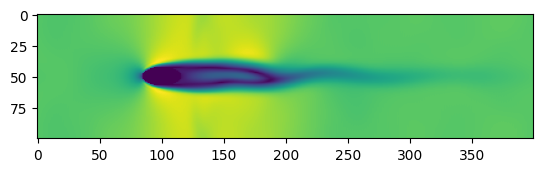

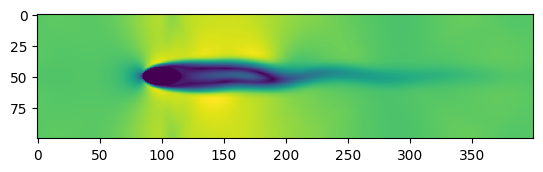

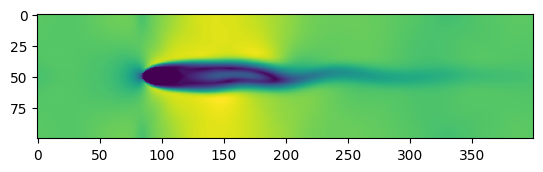

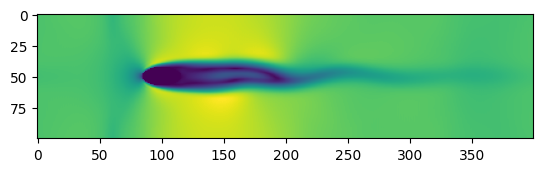

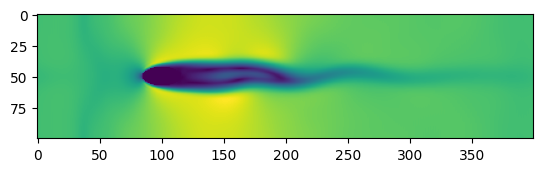

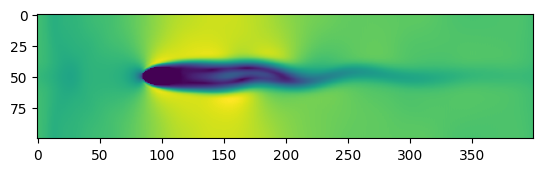

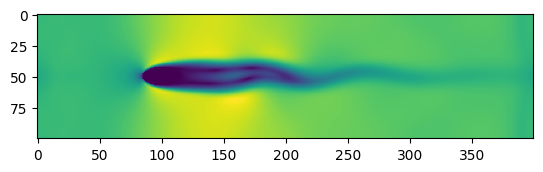

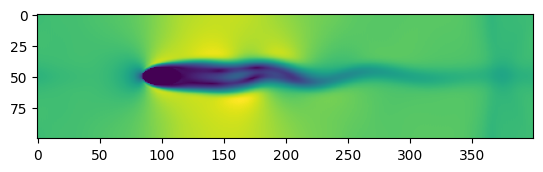

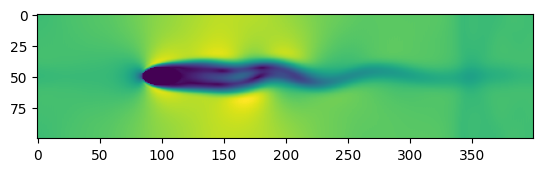

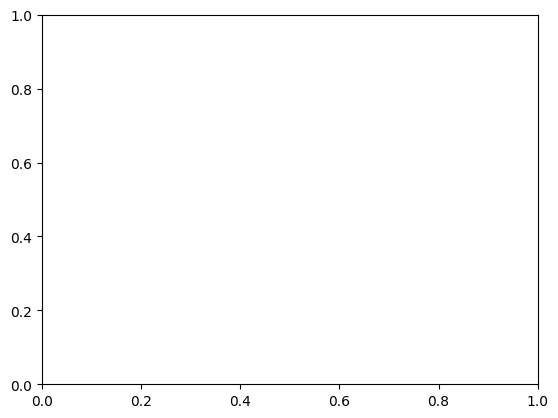

In [ ]:
import numpy as np
from matplotlib import pyplot
beta = 100
Hx, Hy = [], []
plot_every = 50
def distance(x1,y1,x2,y2, b, c):
  return np.sqrt(((x2-x1)**2)/(b**2) + ((y2-y1)**2)/(c**2))
def main():
  Nx = 4*beta
  Ny = beta
  tau = 0.53
  Nt = 3000

  # pesos y velocidades de la lattice
  NL = 9
  cxs = np.array([0,0,1,1,1,0,-1,-1,-1])
  cys = np.array([0,1,1,0,-1,-1,-1,0,1])
  wts = np.array([4/9, 1/9, 1/36, 1/9, 1/36, 1/9,1/36, 1/9,1/36])

  F = np.ones((Ny, Nx, NL)) + 0.01*np.random.randn(Ny,Nx,NL)
  F[:, :, 3] = 2.3
#distance(Nx//4, Ny//2, x, y)<13
  cilindro = np.full((Ny, Nx), False)
  for y in range(0,Ny):
    for x in range(0, Nx):
      if distance(Nx//4, Ny//2, x, y, 0.012*beta, 0.006*beta)<13:
        cilindro[y][x] = True
  for it in range(Nt):
    for i, cx, cy in zip(range(NL), cxs, cys):
      F[:,:,i] = np.roll(F[:,:,i], cx, axis = 1)

      F[:,:,i] = np.roll(F[:,:,i], cy, axis = 0)
    bndrF = F[cilindro, :]
    bndrF = bndrF[:, [0,5,6,7,8,1,2,3,4]]
    rho = np.sum(F,2)
    ux = np.sum(F * [cxs],2)/rho
    uy = np.sum(F * [cys],2)/rho
    F[cilindro, :] = bndrF
    ux[cilindro] = 0
    uy[cilindro] = 0
    Hx.append(np.array([ux]))
    Hy.append(np.array([uy]))
    # Colisiones
    Feq = np.zeros(F.shape)
    for i, cx, cy, w in zip(range(NL), cxs, cys, wts):
      Feq[:,:,i] = rho * w * (
          1+ 3*(cx*ux + cy*uy) + 9*(cx*ux + cy*uy)**2/2 - 3*(ux**2 + uy**2)/2
      )
    F = F -(1/tau) * (F-Feq)

    if(it%plot_every ==0):
      pyplot.imshow(np.sqrt(ux**2 + uy**2))
      pyplot.pause(0.01)
      pyplot.cla()
if __name__ == "__main__":
  main()

In [ ]:
wx,wy = [],[]
for j in range(4*beta):
  for i in range(beta):
    for k in range(2999):
      wx.append((np.array(Hx[k+1][0][i][j]))-np.array((Hx[k][0][i][j]))*3000)


for j in range(4*beta):
  for i in range(beta):
    for k in range(2999):
      wy.append((((np.array(Hy[k+1][0][i][j])-np.array(Hy[k][0][i][j]))*3000)))

In [ ]:

print("Fuerza de arrastre (elipse horizontal): ",  (max(wx)),", Fuerza de sustentación (elipse horizontal)", (max(wy)) )

Fuerza de arrastre (elipse horizontal):  261.86620464151184 , Fuerza de sustentación (elipse horizontal) 146.0856151715581


Número mínimo de puntos para convergencia: 30*120 = 3600